**Tutorial** https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/

Special Library (keras_adversarial):
    
    git clone https://github.com/bstriner/keras_adversarial.git
    cd keras_adversarial
    python setup.py install
    
More info in : https://github.com/bstriner/keras-adversarial#installation

The data set used for this problem is from the populat MNIST data set. Developed by Yann LeCun, Corina Cortes and Christopher Burger for evaluating machine learning model on the handwritten digit classification problem. It is a widely used data set in the machine learning community. For more details about the data set, read here http://bit.ly/1REjJgL
You can download such dataset from : https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/ (where train link has 'train.csv' and digit images for train and test data, and test link has "test.csv" having images name, need to predict the image label). 

Create a 'Data' folder in working directory. In this folder 


In [1]:
# import modules
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed) # creates pseudo-random number generator object 

In [3]:
# set path
root_dir = os.path.abspath('.') # working directory
data_dir = os.path.join(root_dir, 'Data') # ..\Data

In [4]:
# load data
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv')) # ..\Data\Train\train.csv
test = pd.read_csv(os.path.join(data_dir, 'test.csv')) # ../Data/test.csv

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name) # ../Data/Train/Images/train/img_name
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x = train_x / 255.

c:\users\media\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


c:\users\media\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


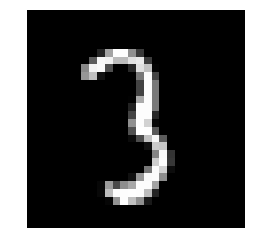

In [5]:
# print image
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [6]:
#define variables
g_input_shape = 100 
d_input_shape = (28, 28) 
hidden_1_num_units = 500 
hidden_2_num_units = 500 
g_output_num_units = 784 
d_output_num_units = 1 
epochs = 25 
batch_size = 128

In [7]:
# generator
model_1 = Sequential([
    Dense(units=hidden_1_num_units, input_dim=g_input_shape, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=g_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
    
    Reshape(d_input_shape), # the output from generator is the input of discriminator
])

# discriminator
model_2 = Sequential([
    InputLayer(input_shape=d_input_shape),
    
    Flatten(),
        
    Dense(units=hidden_1_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=d_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
])

In [8]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               392784    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 693,784
Trainable params: 693,784
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 643,501
Trainable params: 643,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

In [13]:
#compile and start training

#building a combined model
gan = simple_gan(model_1, model_2, normal_latent_sampling((100,)))

model = AdversarialModel(base_model=gan, player_params=[model_1.trainable_weights, model_2.trainable_weights])
model.adversarial_compile(adversarial_optimizer=AdversarialOptimizerSimultaneous(), player_optimizers=['adam', 'adam'], loss='binary_crossentropy')

history = model.fit(x=train_x, y=gan_targets(train_x.shape[0]), epochs=100, batch_size=batch_size)

Epoch 1/100
49000/49000 [==============================] - 31s 640us/step - loss: 18.4289 - player_0_loss: 17.5557 - player_0_yfake_loss: 5.1670 - player_0_yreal_loss: 11.5581 - player_1_loss: 0.8732 - player_1_yfake_loss: 0.0192 - player_1_yreal_loss: 0.0233
Epoch 2/100
49000/49000 [==============================] - 29s 593us/step - loss: 18.2109 - player_0_loss: 17.4625 - player_0_yfake_loss: 5.3049 - player_0_yreal_loss: 11.4320 - player_1_loss: 0.7485 - player_1_yfake_loss: 0.0100 - player_1_yreal_loss: 0.0128
Epoch 3/100
49000/49000 [==============================] - 29s 591us/step - loss: 18.5183 - player_0_loss: 17.8178 - player_0_yfake_loss: 5.4495 - player_0_yreal_loss: 11.6852 - player_1_loss: 0.7005 - player_1_yfake_loss: 0.0074 - player_1_yreal_loss: 0.0099
Epoch 4/100
49000/49000 [==============================] - 29s 595us/step - loss: 19.6631 - player_0_loss: 18.9459 - player_0_yfake_loss: 5.5524 - player_0_yreal_loss: 12.6939 - player_1_loss: 0.7172 - player_1_yfake_los

49000/49000 [==============================] - 28s 580us/step - loss: 20.6007 - player_0_loss: 19.5040 - player_0_yfake_loss: 5.9021 - player_0_yreal_loss: 12.5726 - player_1_loss: 1.0968 - player_1_yfake_loss: 0.0250 - player_1_yreal_loss: 0.0425
Epoch 32/100
49000/49000 [==============================] - 29s 587us/step - loss: 21.2130 - player_0_loss: 20.0801 - player_0_yfake_loss: 6.6159 - player_0_yreal_loss: 12.3977 - player_1_loss: 1.1329 - player_1_yfake_loss: 0.0254 - player_1_yreal_loss: 0.0409
Epoch 33/100
49000/49000 [==============================] - 29s 602us/step - loss: 20.1055 - player_0_loss: 18.9472 - player_0_yfake_loss: 5.6181 - player_0_yreal_loss: 12.2376 - player_1_loss: 1.1583 - player_1_yfake_loss: 0.0258 - player_1_yreal_loss: 0.0409
Epoch 34/100
49000/49000 [==============================] - 29s 599us/step - loss: 20.0066 - player_0_loss: 18.8276 - player_0_yfake_loss: 5.5954 - player_0_yreal_loss: 12.1329 - player_1_loss: 1.1790 - player_1_yfake_loss: 0.0306

Epoch 62/100
49000/49000 [==============================] - 31s 635us/step - loss: 18.3940 - player_0_loss: 16.9758 - player_0_yfake_loss: 4.8960 - player_0_yreal_loss: 10.7815 - player_1_loss: 1.4182 - player_1_yfake_loss: 0.0494 - player_1_yreal_loss: 0.0706
Epoch 63/100
49000/49000 [==============================] - 30s 607us/step - loss: 18.7065 - player_0_loss: 17.2660 - player_0_yfake_loss: 4.9217 - player_0_yreal_loss: 11.0306 - player_1_loss: 1.4405 - player_1_yfake_loss: 0.0492 - player_1_yreal_loss: 0.0776
Epoch 64/100
49000/49000 [==============================] - 31s 634us/step - loss: 18.4878 - player_0_loss: 17.0497 - player_0_yfake_loss: 4.8771 - player_0_yreal_loss: 10.8694 - player_1_loss: 1.4381 - player_1_yfake_loss: 0.0542 - player_1_yreal_loss: 0.0807
Epoch 65/100
49000/49000 [==============================] - 30s 621us/step - loss: 18.3629 - player_0_loss: 16.9094 - player_0_yfake_loss: 5.0792 - player_0_yreal_loss: 10.5175 - player_1_loss: 1.4535 - player_1_yfake

Epoch 93/100
49000/49000 [==============================] - 27s 557us/step - loss: 16.2786 - player_0_loss: 14.8273 - player_0_yfake_loss: 4.0835 - player_0_yreal_loss: 9.4848 - player_1_loss: 1.4513 - player_1_yfake_loss: 0.0799 - player_1_yreal_loss: 0.1124
Epoch 94/100
49000/49000 [==============================] - 27s 550us/step - loss: 15.6391 - player_0_loss: 14.1639 - player_0_yfake_loss: 3.9547 - player_0_yreal_loss: 8.9580 - player_1_loss: 1.4753 - player_1_yfake_loss: 0.0910 - player_1_yreal_loss: 0.133217s - loss: 15.469
Epoch 95/100
49000/49000 [==============================] - 28s 569us/step - loss: 16.0287 - player_0_loss: 14.5564 - player_0_yfake_loss: 3.9973 - player_0_yreal_loss: 9.2978 - player_1_loss: 1.4723 - player_1_yfake_loss: 0.0860 - player_1_yreal_loss: 0.1250
Epoch 96/100
49000/49000 [==============================] - 28s 580us/step - loss: 15.8405 - player_0_loss: 14.3731 - player_0_yfake_loss: 3.8927 - player_0_yreal_loss: 9.2338 - player_1_loss: 1.4674 - 

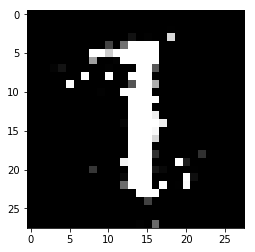

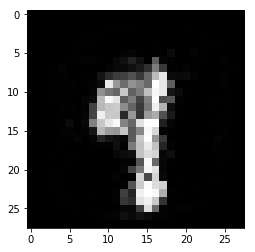

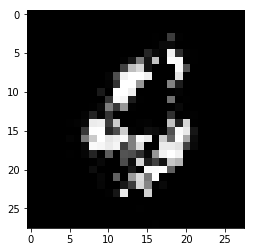

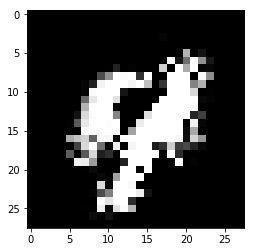

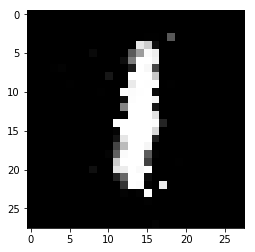

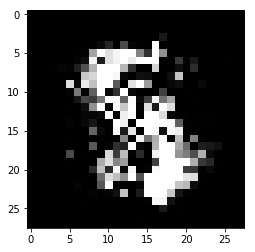

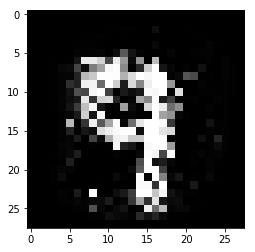

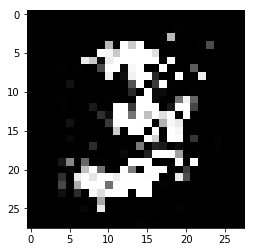

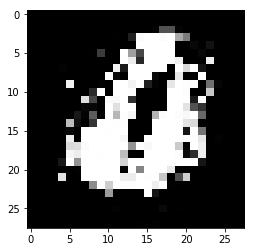

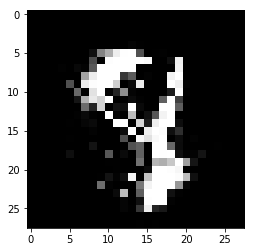

In [14]:
# let's see some generated images
zsamples = np.random.normal(size=(10, 100))
pred = model_1.predict(zsamples)
for i in range(pred.shape[0]):
    plt.imshow(pred[i, :], cmap='gray')
    plt.show()